In [2]:
%matplotlib inline

import cv2
print(cv2.__version__)
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

4.1.1


In [3]:
vc = cv2.VideoCapture(0)
vc.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
vc.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

True

error: OpenCV(4.1.1) /home/pi/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


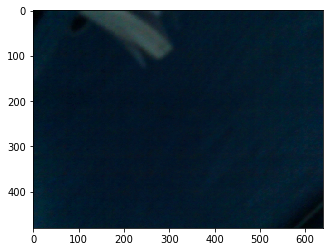

In [4]:
if vc.isOpened():
    is_capturing, frame = vc.read()
    plt.imshow(frame)
    frame = cv2.cvtColor(frame, cv2.cv2.COLOR_BGR2RGB)
    webcam_preview = plt.imshow(frame)
else:
    is_capturing = False

#colorLow = np.array([35,43,46]) #green(HSV)
#colorHigh = np.array([90,255,255]) #green(HSV)
colorLow = np.array([100,43,46]) #blue
colorHigh = np.array([124,255,255])  #blue

while is_capturing:
    try:   # Lookout for a keyboardInterrupt to stop the script
        is_capturing, frame = vc.read()
        HSVframe =cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        try:     #detects object of specific color 
            mask = cv2.inRange(HSVframe, colorLow, colorHigh)
            contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

            c = max(contours, key = cv2.contourArea)
            x,y,w,h = cv2.boundingRect(c)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),20)
        except:
            print("there is no object")
        print("111111")
        webcam_preview.set_data(frame)
        plt.draw()        
        display.clear_output(wait=True)
        display.display(plt.gcf())
    
    except KeyboardInterrupt:
    #except:
        print("error")
        display.clear_output(wait=True)
        vc.release()